# Stochastic Differential Equations

## Simulating Brownian Motion

First, we want to estimate the density of a single Brownian path using Monte Carlo. We will formulate this problem as follows:

1. First, we define the Brownian update using the Euler-Murayama scheme.

In [68]:
from numpy.random import normal
from typing import Callable

def euler_murayama_update (
    position,           # u, float
    forcing_term,       # a, callable
    timestep,           # n, int
    timescale,          # dt, float
    chaos=1.            # used to dampen or strengthen Brownian term
):
    return position + forcing_term(timestep * timescale, position) * timescale + chaos * normal(loc=0., scale=timescale)

2. Second, we define the Brownian path by applying the EM scheme over $k$ timesteps with no forcing term:

In [78]:
from numpy import linspace

def simulate_brownian_path (
    timescale=1e-3  # EM update timescale
):
    # Define useful state
    endtime = 1.
    position = 0. # dirac delta
    forcing_term = lambda time, position: 0 # Pure brownian motion, so no forcing term
    timesteps = int(endtime / timescale)
    # Perform EM updates
    for timestep in range(timesteps):
        position = euler_murayama_update(position, forcing_term, timestep, timescale)
    # Return
    return position

3. We compute the distribution of paths using Monte-Carlo:

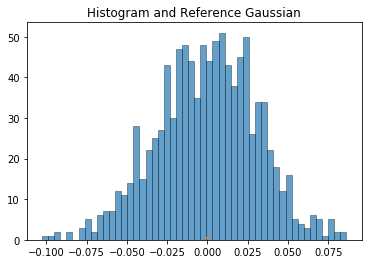

In [72]:
%matplotlib inline

from numpy import array
from matplotlib import pyplot as plt
from scipy.stats import norm

# Compute paths
NUM_PATHS = 1000
paths = array([simulate_brownian_path(timescale=1e-3) for i in range(NUM_PATHS)])

# Compute reference Gaussian for comparison
#x = linspace(-1e-3, 1e-3, 100)
#gaussian = norm.pdf(x)

# Plot histogram and reference Gaussian
plt.hist(paths, bins=50, alpha=.7, edgecolor="black", linewidth=.5)
plt.plot(x, gaussian)
plt.title("Histogram and Reference Gaussian")
plt.show()

# INCOMPLETE # Variance should be 1.

Now, we compute the probability of a brownian path ending up within $[-1., 1.]$

In [73]:
# Check paths which are in range
num_in_range = ((paths >= -1.) & (paths <= 1.)).sum()
print(f"The probability of the paths ending in [-1., 1.] is {num_in_range / paths.size:.3f}")

The probability of the paths ending in [-1., 1.] is 1.000


## Simulating Forces with Brownian Motion

We will simulate the following system:
$$ du = -\frac{1}{2} u (1 - u^2) dt + \frac{1}{10} dw $$

This corresponds to the following:

In [74]:
def simulate_force_path (
    seed_fn,        # function that defines where paths are instantiated from
    timescale=1e-3  # EM update timescale
):
    # Define useful state
    endtime = 1.
    position = seed_fn()
    forcing_term = lambda time, position: -0.5 * position * (1 - position ** 2)
    timesteps = int(endtime / timescale)
    # Perform EM updates
    for timestep in range(timesteps):
        position = euler_murayama_update(position, forcing_term, timestep, timescale, chaos=0.1)
    # Return
    return position

We will estimate the density when the initial density is $\delta(x)$ and when $x \sim \mathcal{N}(-0.1, -0.1^2)$

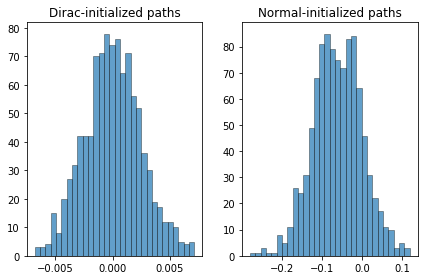

In [91]:
# Good number of paths
NUM_PATHS = 1000

# Define seed functions
dirac_seed = lambda: 0
normal_seed = lambda: normal(loc=-0.1, scale=0.1)

# Estimate with the above seed functions
paths_dirac_initial = array([simulate_force_path(dirac_seed, timescale=1e-3) for i in range(NUM_PATHS)])
paths_normal_initial = array([simulate_force_path(normal_seed, timescale=1e-3) for i in range(NUM_PATHS)])

# Plot densities
plt.subplot(1, 2, 1)
plt.hist(paths_dirac_initial, bins=30, alpha=.7, edgecolor="black", linewidth=.5)
plt.title("Dirac-initialized paths")
plt.subplot(1, 2, 2)
plt.hist(paths_normal_initial, bins=30, alpha=.7, edgecolor="black", linewidth=.5, label="Normal-initialized")
plt.title("Normal-initialized paths")
plt.tight_layout(w_pad=2)
plt.show()

## Fokker-Planck Derivation
**INCOMPLETE**